In [195]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from timeit import default_timer as timer
import math
import pandas as pd
from datetime import datetime
from datetime import date

In [5]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def scaling(d, M):
    r = 1
    for i in range(d):
        r += M ** (i+1)
    return r

In [284]:
def process_df(path):
    df = pd.read_csv(path)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    start = date.fromisoformat('2022-06-24')
    end = date.fromisoformat('2023-06-23')
    new_dates = pd.date_range(start=start,end=end,freq='D')
    df = df.reindex(new_dates)
    assert( len(df) == 365 )
    df["Open"] = df["Open"].interpolate()
    df["Open"] =( df["Open"] - df["Open"].mean() ) / df["Open"].std()
    return(df["Open"])

## Import and clean finance data

In [283]:
file_paths = [r'datasets\cov_^N225.csv', r'datasets\cov_^NDX.csv', r'datasets\cov_^NYA.csv',
             r'datasets\cov_^SPX.csv', r'datasets\cov_^TNX.csv', r'datasets\cov_^VIX.csv',
             r'datasets\cov_^XAU.csv', r'datasets\cov_^XOI.csv', r'datasets\cov_000300.SS.csv',
             r'datasets\cov_BTC-USD.csv', r'datasets\cov_CGW.csv', r'datasets\cov_DAX.csv',
             r'datasets\cov_EURUSD=X.csv', r'datasets\cov_FEZ.csv', r'datasets\cov_GBPUSD=X.csv',
              r'datasets\cov_INDEX.csv', r'datasets\cov_MME=F.csv', r'datasets\cov_USDJPY=X.csv', 
              r'datasets\cov_VGSLX.csv', r'datasets\cov_VTI.csv'
             ]
amazon_file_path = r'datasets\target_AMZN.csv'
len(file_paths)

20

In [338]:
df_amzn = pd.read_csv(amazon_file_path)

In [339]:
df_amzn['Date'] = pd.to_datetime(df_amzn['Date'])

In [340]:
df_amzn = df_amzn.set_index('Date')

In [341]:
start = date.fromisoformat('2022-06-24')
end = date.fromisoformat('2023-06-23')

In [342]:
new_dates = pd.date_range(start=start,end=end,freq='D')
df_amzn = df_amzn.reindex(new_dates)

In [343]:
assert( len(df_amzn) == 365 )
df_amzn["Open"] = df_amzn["Open"].interpolate()
df_amzn["Open"] =( df_amzn["Open"] - df_amzn["Open"].mean() ) / df_amzn["Open"].std()
df_amzn.rename(columns={"Open": "amzn"})

df_amzn["amzn"] = df_amzn["Open"]

df_amzn = df_amzn.drop(columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

df_amzn

,amzn
2022-06-24,0.254158
2022-06-25,0.355996
2022-06-26,0.457834
2022-06-27,0.559671
2022-06-28,0.326807
...,...
2023-06-19,1.115239
2023-06-20,1.070807
2023-06-21,1.114266
2023-06-22,1.092861


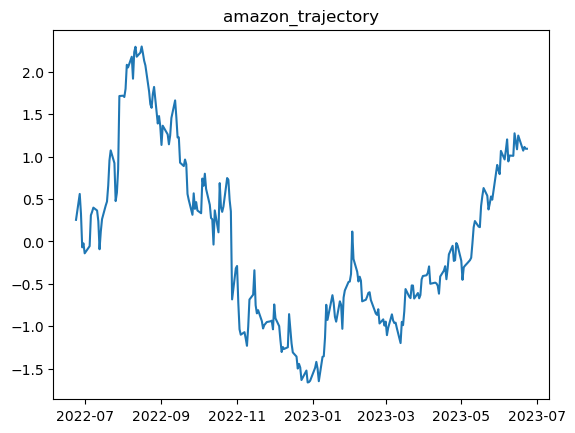

In [352]:
plt.plot(df_amzn.index,df_amzn['amzn'])
plt.title("Trajectory of the standardized Amazon trajectory")
plt.show()

In [286]:
path = file_paths[0]
path

'datasets\\cov_^N225.csv'

In [287]:
process_df(path)

2022-06-24   -1.113145
2022-06-25   -1.005608
2022-06-26   -0.898071
2022-06-27   -0.790535
2022-06-28   -0.756677
                ...   
2023-06-19    3.625187
2023-06-20    3.311538
2023-06-21    3.268215
2023-06-22    3.417387
2023-06-23    3.430168
Freq: D, Name: Open, Length: 365, dtype: float64

In [349]:
i = 1
for path in file_paths:
    df_amzn['cov' + str(i)] = process_df(path)
    i+=1

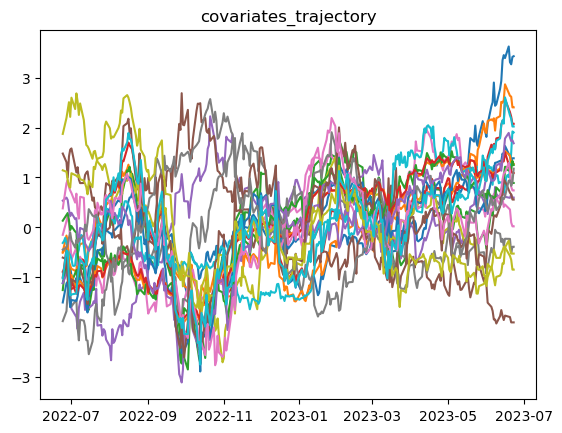

In [351]:
for i in range(1, 21):
    plt.plot(df_amzn.index, df_amzn['cov' + str(i)])
plt.title("covariates_trajectory")
plt.show()